### Step 1: Import the "gen_bolos" module
    This is a set of scripts that allow the sensitivity calculator (BoloCalc) to be configured and executed entirely within a jupyter notebook

In [1]:
from gen_bolos import GenBolos

### Step 2: Set up configuration files
    The GenBolos class requires 1) your file path to "calcBolos.py", 2) your file path to the experiment directory (in this case "specter_v1"), and 3) a tuple of band edges

In [2]:
bc_fp = '/home/cesierra/software/bolocalc-space/calcBolos.py'

exp_fp = '/home/cesierra/software/bolocalc-space/Experiments/specter_v1/'

band_edges =( 
[10, 40] ,
[40, 80] ,
[80, 120] ,
[120, 200] ,
[200, 300] ,
[300, 500] ,
[500, 700] ,
[700, 1000] )

### Step 3: Initialize GenBolos and run calc_bolos()

In [3]:
bolos = GenBolos(bc_fp, exp_fp, band_edges)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [ ]:
bolos.

In [4]:
# calc_bolos() runs "calcBolos.py" and returns a dictionary of NETs and optical powers for each given band
sensitivity_dict = bolos.calc_bolos()

Simulting 1 experiment realizations each with 1 detector realizations and 1 sky realizations. Total sims = 1

[                                                                                                    ] 0.0%
[====================================================================================================] 100.0%



In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(sensitivity_dict).T
df

,Center Frequency [GHz],NET_CMB [uK-rtSec],NET_RJ [uK-rtSec],Optical Power [pW]
1,25.0,32.3218,4.6660,0.5092
2,60.0,29.6465,4.2797,0.4234
3,100.0,32.4715,4.6876,0.2404
4,160.0,25.6667,3.7052,0.2486
5,250.0,33.3060,4.8080,0.0947
6,400.0,51.4856,7.4324,0.0308
7,600.0,259.9106,37.5205,0.0024
8,850.0,3569.9779,515.3593,0.0010


In [7]:
# write to text file
#df.to_csv('sensitivity.txt', sep='\t' ,encoding='utf-8')

#### In addition to running calc_bolos(), the "bolos" object has other useful info such as band centers, pixel sizes, etc...

In [6]:
for j,nu_0 in enumerate(bolos.band_centers):
    print(f'Detector at {nu_0:0.1f} GHz has a pixel diameter of {bolos.pixel_sizes[j]:0.1f} mm')

Detector at 25.0 GHz has a pixel diameter of 80.0 mm
Detector at 60.0 GHz has a pixel diameter of 20.0 mm
Detector at 100.0 GHz has a pixel diameter of 10.0 mm
Detector at 160.0 GHz has a pixel diameter of 6.7 mm
Detector at 250.0 GHz has a pixel diameter of 4.0 mm
Detector at 400.0 GHz has a pixel diameter of 2.7 mm
Detector at 600.0 GHz has a pixel diameter of 1.6 mm
Detector at 850.0 GHz has a pixel diameter of 1.1 mm


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font='serif', font_scale=1.5)
figsize = (10,8)

Text(0.5, 0, 'GHz')

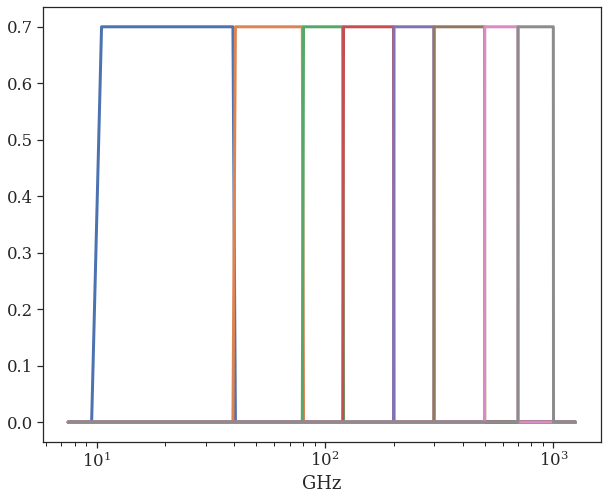

In [11]:
plt.figure(figsize=figsize)
for band in bolos.passbands:
    plt.semilogx(bolos.freqs, band, linewidth=3)
    
plt.xlabel('GHz')